# 1. Data Loading and Initial Exploration:
-  Load the selected dataset into your preferred data analysis environment
- Explore the structure of the dataset (number of rows and columns, data types, etc.
- Examine the first few rows of the dataset to understand its contents.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IKEA_Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10445 entries, 0 to 10444
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10445 non-null  int64  
 1   item_id            10445 non-null  int64  
 2   name               10445 non-null  object 
 3   category           10445 non-null  object 
 4   price              10445 non-null  float64
 5   old_price          10445 non-null  object 
 6   sellable_online    10445 non-null  bool   
 7   link               3694 non-null   object 
 8   other_colors       10445 non-null  object 
 9   short_description  10445 non-null  object 
 10  designer           10445 non-null  object 
 11  depth              6319 non-null   float64
 12  height             7656 non-null   float64
 13  width              8754 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 1.0+ MB


In [4]:
df.describe()

,Unnamed: 0,item_id,price,depth,height,width
count,10445.000000,1.044500e+04,10445.000000,6319.000000,7656.000000,8754.000000
mean,5222.000000,6.190065e+07,1284.121101,54.670043,98.867163,102.942312
std,3015.356115,1.978395e+07,837.166956,30.462030,58.738691,70.524784
min,0.000000,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2611.000000,6.915751e+07,1200.000000,38.000000,66.000000,57.250000
50%,5222.000000,6.916012e+07,1344.000000,47.000000,83.000000,80.000000
75%,7833.000000,6.916272e+07,1496.000000,60.000000,114.000000,136.000000
max,10444.000000,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [5]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


# 2. Data Cleaning:- Handle missing values appropriately (e.g., imputation, deletion, etc.).
- Check for and handle any duplicate entries
- Convert categorical variables into the appropriate data type if necessary.

In [6]:
df.drop(['item_id','link','designer','short_description','depth','height','width'],axis=1, inplace=True)

In [7]:
df.columns

Index(['Unnamed: 0', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'other_colors'],
      dtype='object')

In [8]:
df

,Unnamed: 0,name,category,price,old_price,sellable_online,other_colors
0,0,FREKVENS,Bar furniture,265.0,No old price,True,No
1,1,NORDVIKEN,Bar furniture,995.0,No old price,False,No
2,2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,No
3,3,STIG,Bar furniture,69.0,No old price,True,Yes
4,4,NORBERG,Bar furniture,225.0,No old price,True,No
...,...,...,...,...,...,...,...
10440,10440,IDÅSEN,Chairs,1228.0,No old price,True,No
10441,10441,EKEDALEN / EKEDALEN,Chairs,1417.0,No old price,True,No
10442,10442,IDÅSEN,Chairs,1543.0,No old price,True,No
10443,10443,EKEDALEN,Chairs,1586.0,No old price,True,No


In [9]:
df.isnull().sum()

Unnamed: 0         0
name               0
category           0
price              0
old_price          0
sellable_online    0
other_colors       0
dtype: int64

In [10]:
# We convert 'No old price' which are str format to intger format = 0
df.replace(to_replace="No old price",
           value=0, inplace=True)

In [11]:
df

,Unnamed: 0,name,category,price,old_price,sellable_online,other_colors
0,0,FREKVENS,Bar furniture,265.0,0,True,No
1,1,NORDVIKEN,Bar furniture,995.0,0,False,No
2,2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,0,False,No
3,3,STIG,Bar furniture,69.0,0,True,Yes
4,4,NORBERG,Bar furniture,225.0,0,True,No
...,...,...,...,...,...,...,...
10440,10440,IDÅSEN,Chairs,1228.0,0,True,No
10441,10441,EKEDALEN / EKEDALEN,Chairs,1417.0,0,True,No
10442,10442,IDÅSEN,Chairs,1543.0,0,True,No
10443,10443,EKEDALEN,Chairs,1586.0,0,True,No


# 3- Exploratory Data Analysis:
- Conduct univariate analysis to understand the distribution of individual variables (e.g., listin 
prices, number of reviews, etc.-  Perform bivariate analysis to explore relationships between variables (e.g., price vs. propert 
type, price vs. neighborhood, e.V- ● Visualize the data using appropriate plots (e.g., histograms, box plots, scatter plo) etc )- 
● Calculate summary statistics for relevant variables.


 **Multivriate Analysis:**

**Which category has maximum price based on the sellable online?**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Bar furniture'),
  Text(1, 0, 'Beds'),
  Text(2, 0, 'Bookcases & shelving units'),
  Text(3, 0, 'Cabinets & cupboards'),
  Text(4, 0, 'Café furniture'),
  Text(5, 0, 'Chairs'),
  Text(6, 0, 'Chests of drawers & drawer units'),
  Text(7, 0, "Children's furniture"),
  Text(8, 0, 'Nursery furniture'),
  Text(9, 0, 'Outdoor furniture'),
  Text(10, 0, 'Room dividers'),
  Text(11, 0, 'Sideboards, buffets & console tables'),
  Text(12, 0, 'Sofas & armchairs'),
  Text(13, 0, 'Tables & desks'),
  Text(14, 0, 'Trolleys'),
  Text(15, 0, 'TV & media furniture'),
  Text(16, 0, 'Wardrobes')])

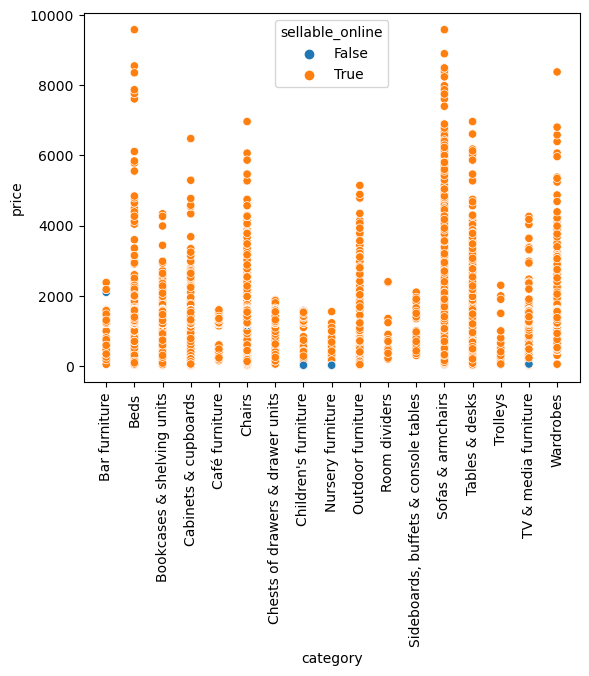

In [12]:
sns.scatterplot(x='category', y='price', hue='sellable_online', data=df)
plt.xticks(rotation=90)

In [13]:
cat_price = df.groupby(['category'])['price'].max().reset_index()
cat_price

,category,price
0,Bar furniture,2375.0
1,Beds,9585.0
2,Bookcases & shelving units,4335.0
3,Cabinets & cupboards,6480.0
4,Café furniture,1599.0
5,Chairs,6965.0
6,Chests of drawers & drawer units,1880.0
7,Children's furniture,1575.0
8,Nursery furniture,1545.0
9,Outdoor furniture,5144.0


**- Which catgory has the maximum price?**

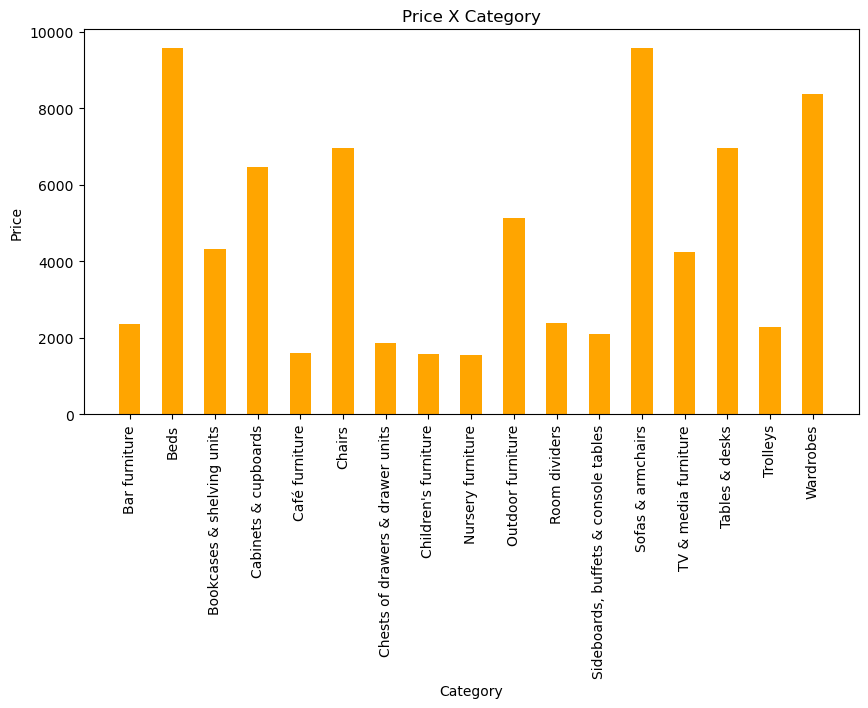

In [14]:
categ = cat_price['category']
price = cat_price['price']
fig = plt.figure(figsize = (10,5))

plt.bar(categ, price, color='orange', width=0.5)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Price X Category')
plt.xticks(rotation=90)

plt.show()

Univariate Analysis:

**- Which category do people prefer to buy from?**

[Text(0, 0, 'Bar furniture'),
 Text(1, 0, 'Beds'),
 Text(2, 0, 'Bookcases & shelving units'),
 Text(3, 0, 'Cabinets & cupboards'),
 Text(4, 0, 'Café furniture'),
 Text(5, 0, 'Chairs'),
 Text(6, 0, 'Chests of drawers & drawer units'),
 Text(7, 0, "Children's furniture"),
 Text(8, 0, 'Nursery furniture'),
 Text(9, 0, 'Outdoor furniture'),
 Text(10, 0, 'Room dividers'),
 Text(11, 0, 'Sideboards, buffets & console tables'),
 Text(12, 0, 'Sofas & armchairs'),
 Text(13, 0, 'Tables & desks'),
 Text(14, 0, 'Trolleys'),
 Text(15, 0, 'TV & media furniture'),
 Text(16, 0, 'Wardrobes')]

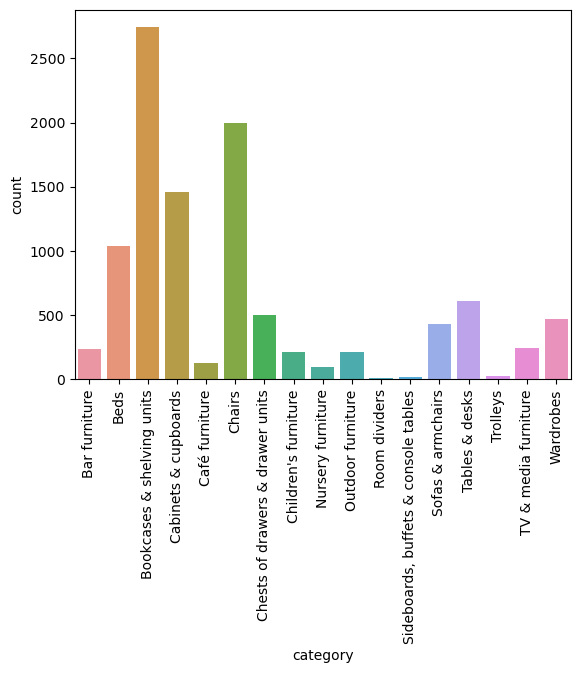

In [15]:
my_plot = sns.countplot(data=df, x='category')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

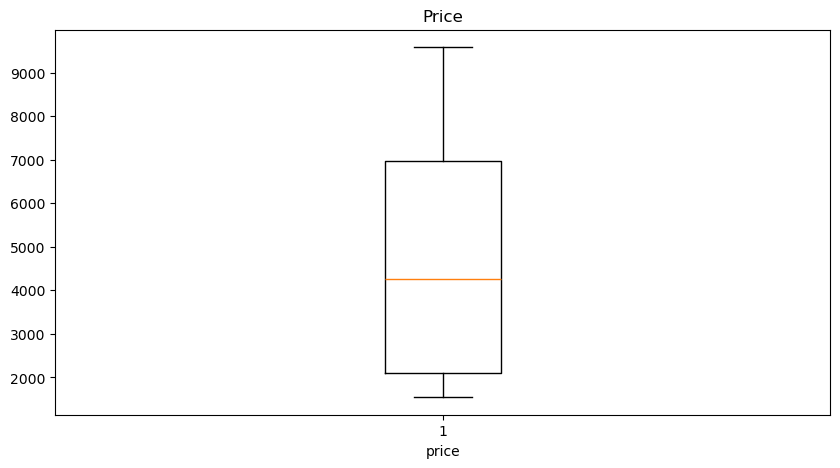

In [16]:
price = cat_price['price']
fig = plt.figure(figsize=(10,5))

plt.boxplot(price)
plt.xlabel('price')
plt.title('Price')
plt.show()

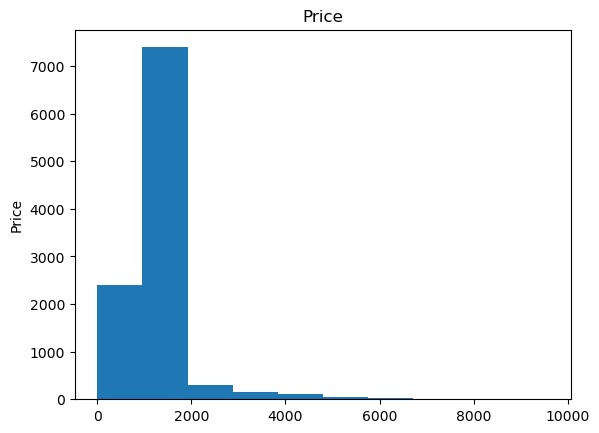

In [17]:
y = df['price']
plt.hist(y)
plt.title('Price')
plt.ylabel('Price');

# 4- Feature Engineering:
- Create new features that might be useful for analysis (e.g., average rating, occupancy rate,
etc.).
- Encode categorical variables if necessary (e.g., one-hot encoding, label encoding,

In [18]:
encoded_df = pd.get_dummies(df['sellable_online'])
print(encoded_df)

       False  True 
0      False   True
1       True  False
2       True  False
3      False   True
4      False   True
...      ...    ...
10440  False   True
10441  False   True
10442  False   True
10443  False   True
10444  False   True

[10445 rows x 2 columns]


In [19]:
encoded_df = pd.get_dummies(df['other_colors'])
print(encoded_df)

          No    Yes
0       True  False
1       True  False
2       True  False
3      False   True
4       True  False
...      ...    ...
10440   True  False
10441   True  False
10442   True  False
10443   True  False
10444   True  False

[10445 rows x 2 columns]


In [20]:
df['sellable_online'] = df['sellable_online'].astype(int)

In [21]:
# Define new column that shows the average of row values:
df['Average_Price'] = df[['price','sellable_online']].mean(axis=1)

In [22]:
df

,Unnamed: 0,name,category,price,old_price,sellable_online,other_colors,Average_Price
0,0,FREKVENS,Bar furniture,265.0,0,1,No,133.0
1,1,NORDVIKEN,Bar furniture,995.0,0,0,No,497.5
2,2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,0,0,No,1047.5
3,3,STIG,Bar furniture,69.0,0,1,Yes,35.0
4,4,NORBERG,Bar furniture,225.0,0,1,No,113.0
...,...,...,...,...,...,...,...,...
10440,10440,IDÅSEN,Chairs,1228.0,0,1,No,614.5
10441,10441,EKEDALEN / EKEDALEN,Chairs,1417.0,0,1,No,709.0
10442,10442,IDÅSEN,Chairs,1543.0,0,1,No,772.0
10443,10443,EKEDALEN,Chairs,1586.0,0,1,No,793.5
